## Manipulation Images

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

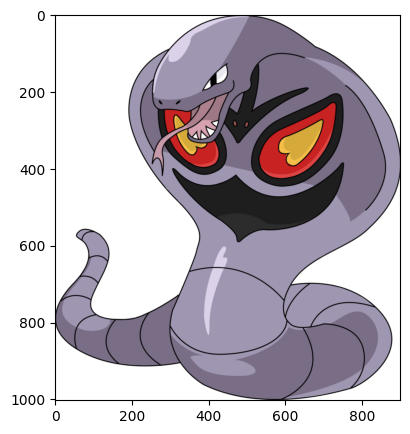

In [4]:
arbok = np.array(Image.open('/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Arbok/00000003.png'))
plt.figure(figsize=(5,5))
plt.imshow(arbok )
plt.show()

In [5]:
A = arbok

we can see that this file version has the same memory location as the original arbok file

In [6]:
id(A) == id(arbok)

True

we can see that the copied version B of Arbok is no longer in the same memory location as the original arbok file

In [7]:
B = arbok.copy()
id(B)==id(arbok)

False

In [8]:
arbok[:,:,]=0

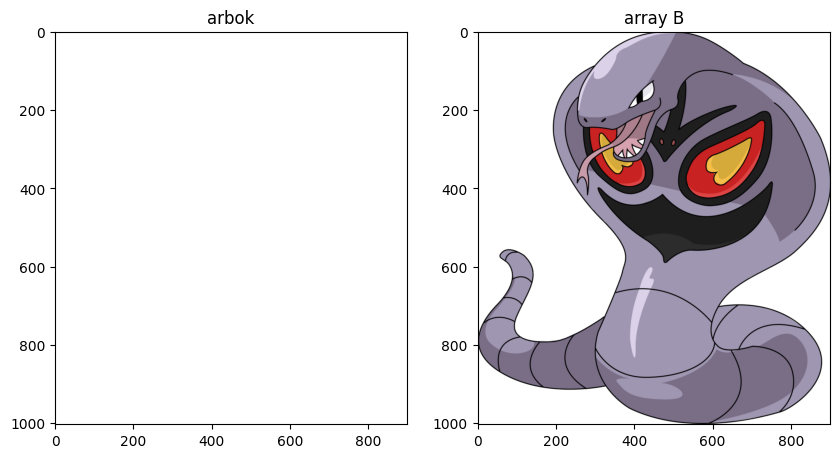

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(arbok)
plt.title("arbok")
plt.subplot(122)
plt.imshow(B)
plt.title("array B")
plt.show()

## Flipping Images

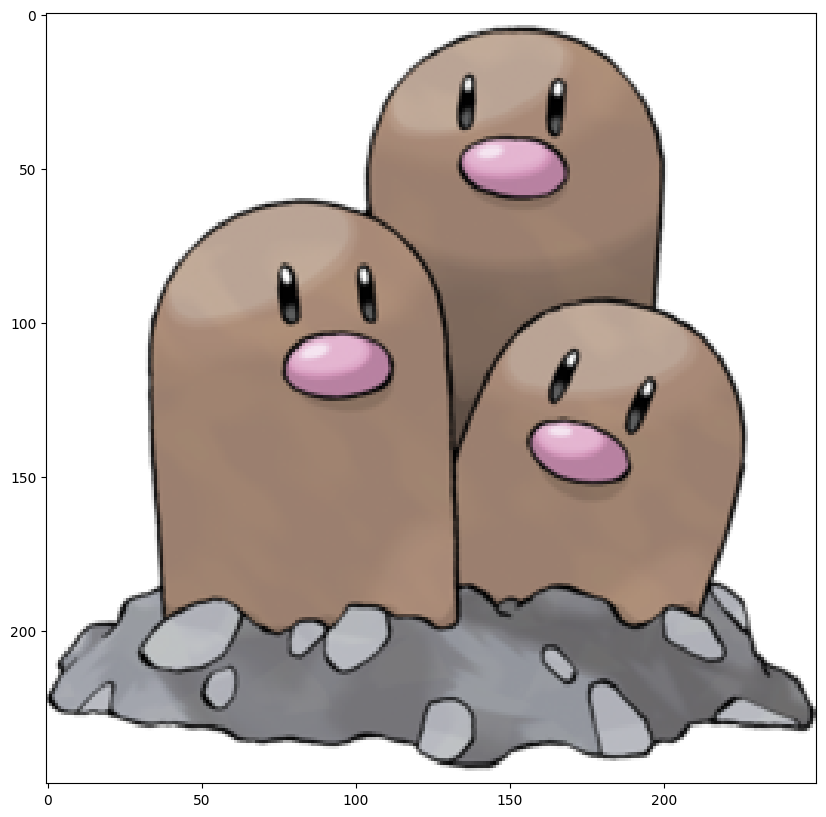

In [10]:
image = Image.open("/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Dugtrio/00000001.png")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [11]:
array = np.array(image)
width, height, C = array.shape
print('width, height, C', width, height, C)

width, height, C 250 250 4


In [14]:
array_flip = np.zeros((width, height, C), dtype=np.uint8)

In [15]:
for i, row in enumerate(array):
    array_flip[width - 1 - i, :, :] = row

In [16]:
from PIL import ImageOps

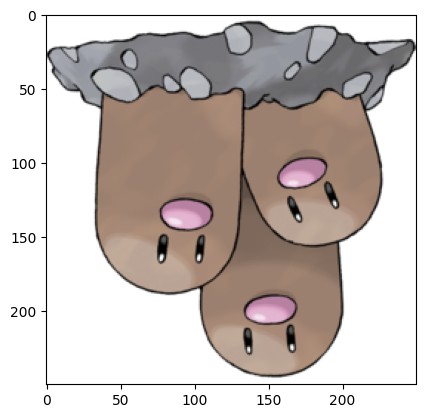

In [17]:
im_flip = ImageOps.flip(image)
plt.imshow(im_flip)
plt.show()

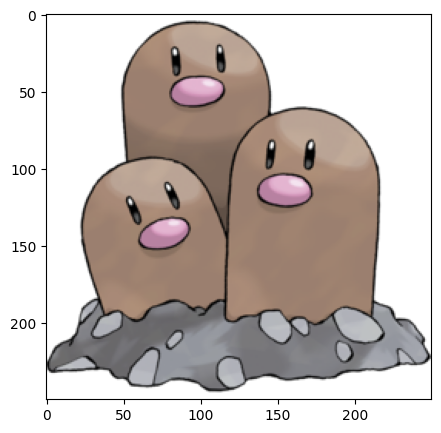

In [20]:
im_mirror = ImageOps.mirror(image)
plt.figure(figsize=(5,5))
plt.imshow(im_mirror)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

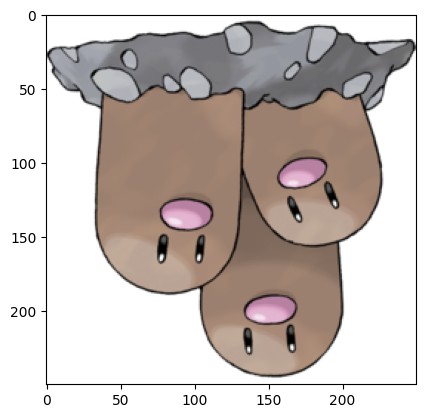

In [19]:
im_flip = image.transpose(1)
plt.imshow(im_flip)
plt.show

In [21]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

In [22]:
flip["FLIP_LEFT_RIGHT"]

0

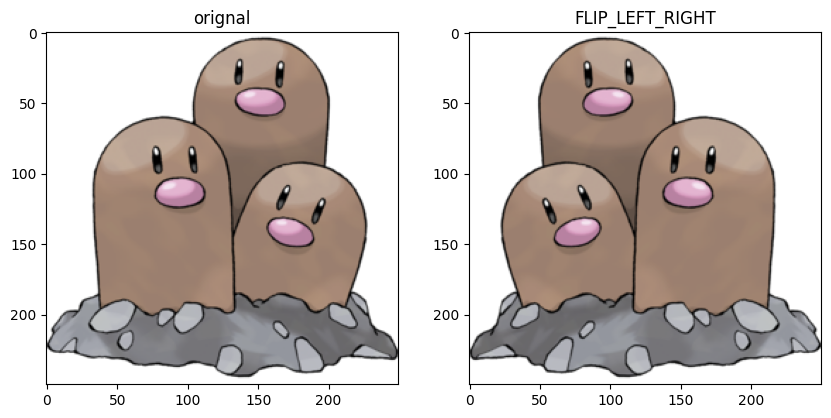

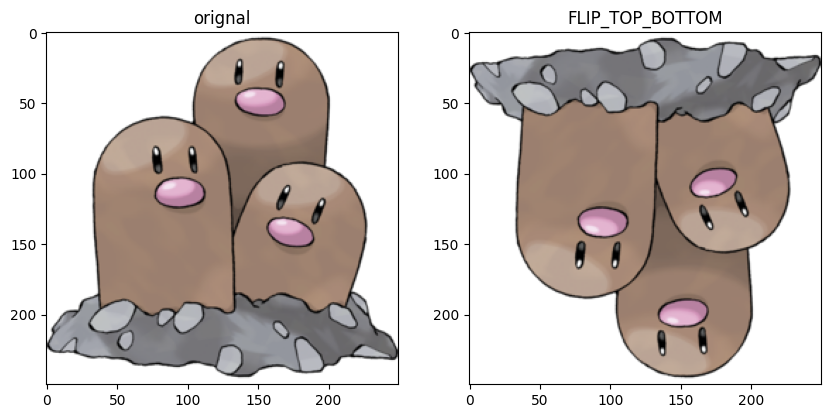

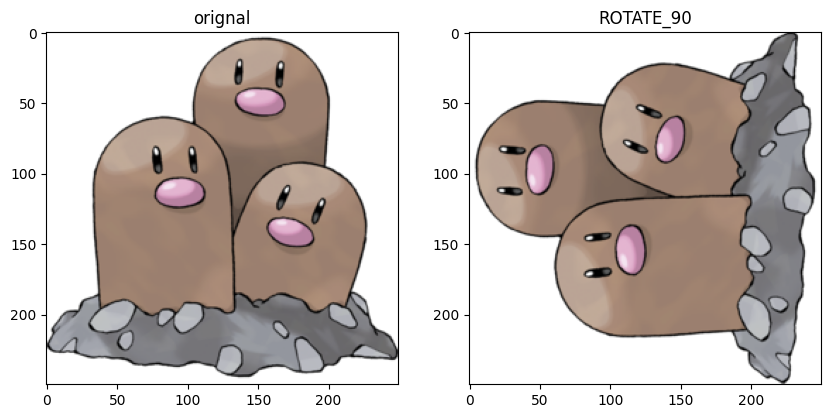

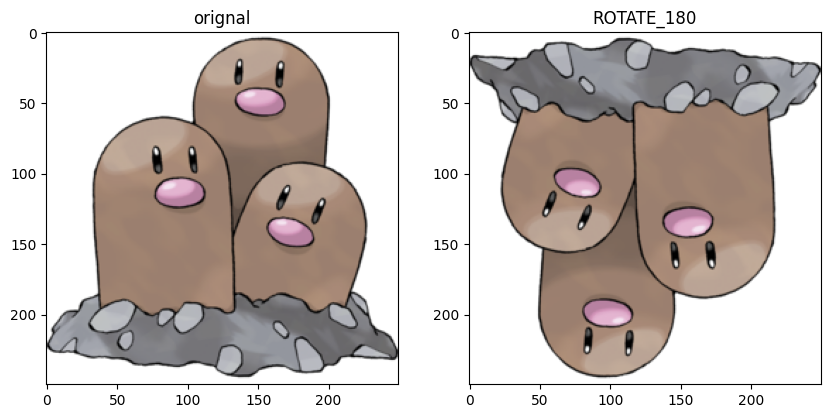

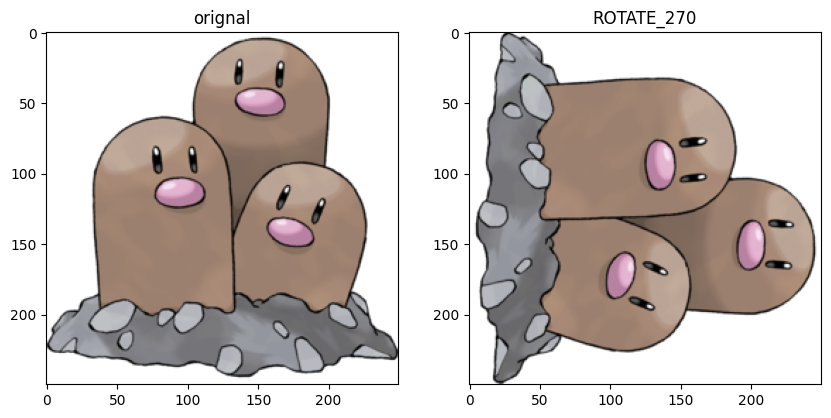

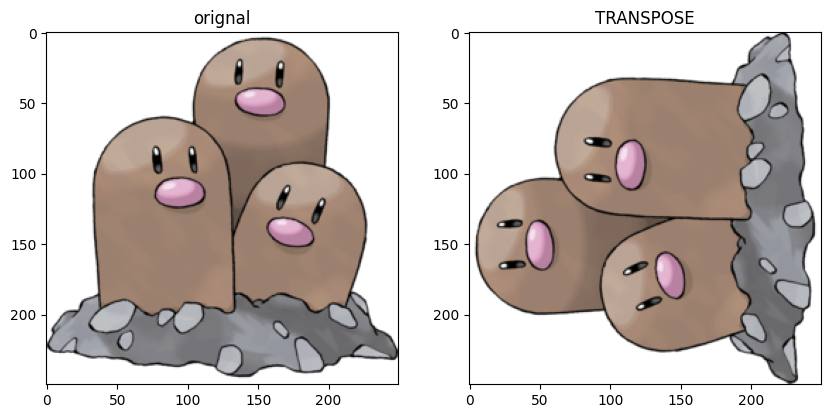

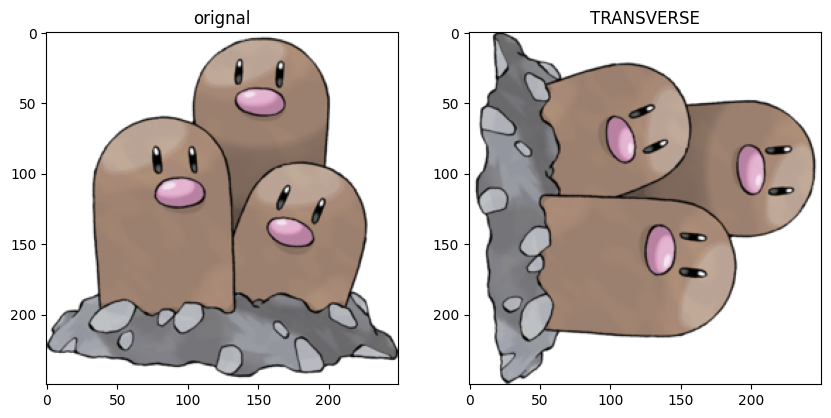

In [23]:
for key, values in flip.items():
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(image.transpose(values))
    plt.title(key)
    plt.show()

## Cropping an Image

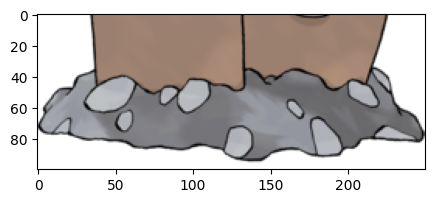

In [26]:
upper = 150
lower = 400
crop_top = array[upper: lower,:,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_top)
plt.show()

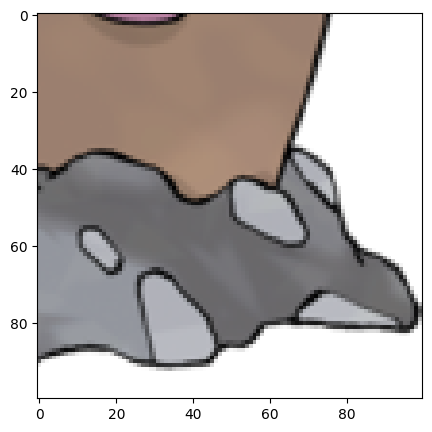

In [27]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(crop_horizontal)
plt.show()

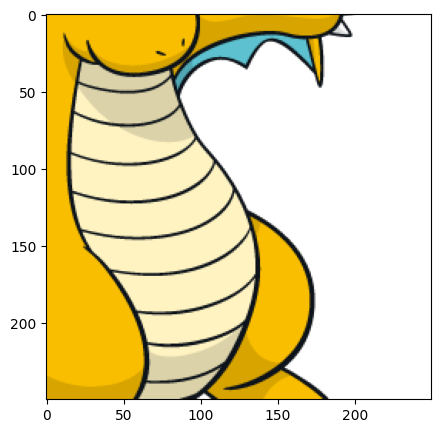

In [28]:
image = Image.open("/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Dragonite/00000001.png")
crop_image = image.crop((left, upper, right, lower))
plt.figure(figsize=(5,5))
plt.imshow(crop_image)
plt.show()

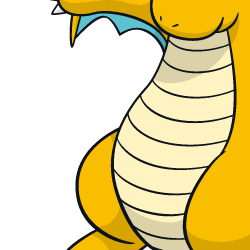

In [29]:
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

In [30]:
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:2] = 0

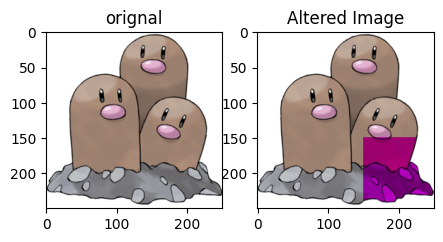

In [31]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title("Altered Image")
plt.show()

In [32]:
from PIL import ImageDraw 

In [33]:
image_draw = image.copy()

In [34]:
image_fn = ImageDraw.Draw(im=image_draw)

In [35]:
shape = [left, upper, right, lower] 
image_fn.rectangle(xy=shape,fill="red")

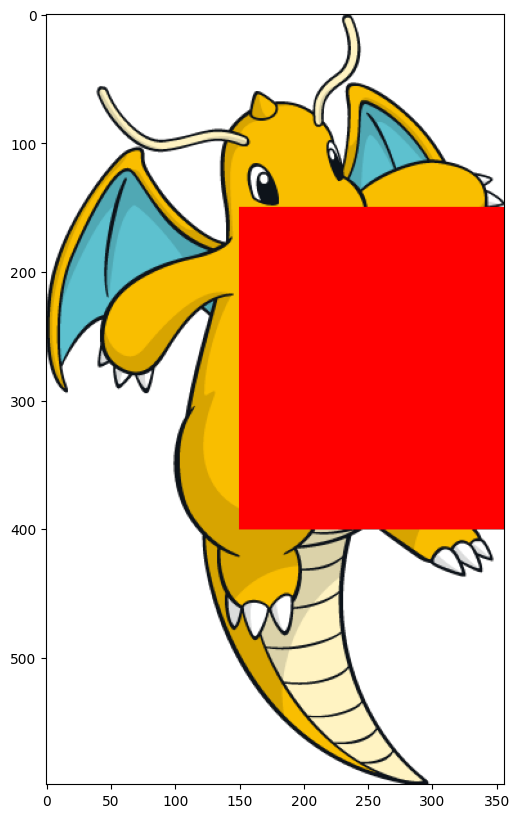

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

In [37]:
from PIL import ImageFont

In [38]:
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))

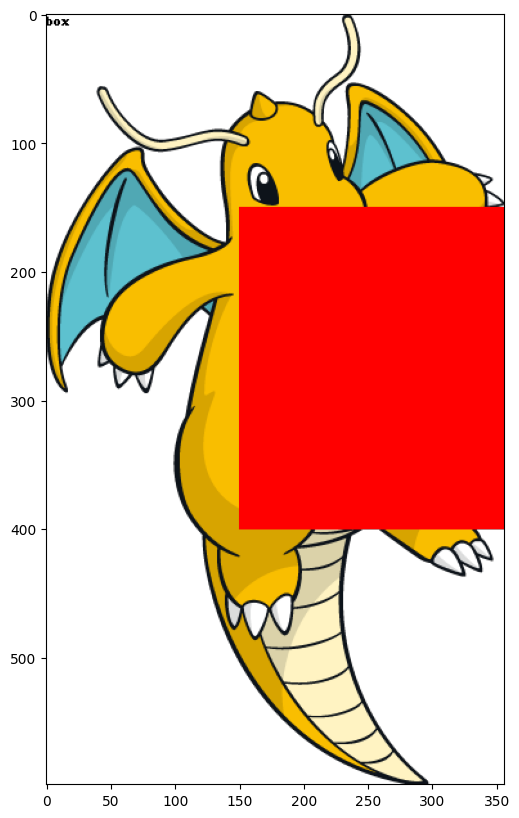

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(image_draw)
plt.show()

In [41]:
image_cubone = Image.open("/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Cubone/00000000.png")
array_cubone = np.array(image_cubone)

In [42]:
array_cubone[upper:lower,left:right,:]=array[upper:lower,left:right,:]
plt.imshow(array_cubone)
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [43]:
image_cubone.paste(crop_image, box=(left,upper))

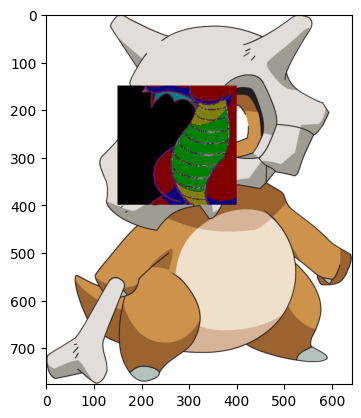

In [44]:
plt.imshow(image_cubone)
plt.show()

In [49]:
image = Image.open("/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Bellsprout/00000000.png")
new_image=image
copy_image=image.copy()

In [50]:
id(image)==id(new_image)

True

In [51]:
id(image)==id(copy_image)

False

In [52]:
image_fn= ImageDraw.Draw(im=image)
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))
image_fn.rectangle(xy=shape,fill="red")

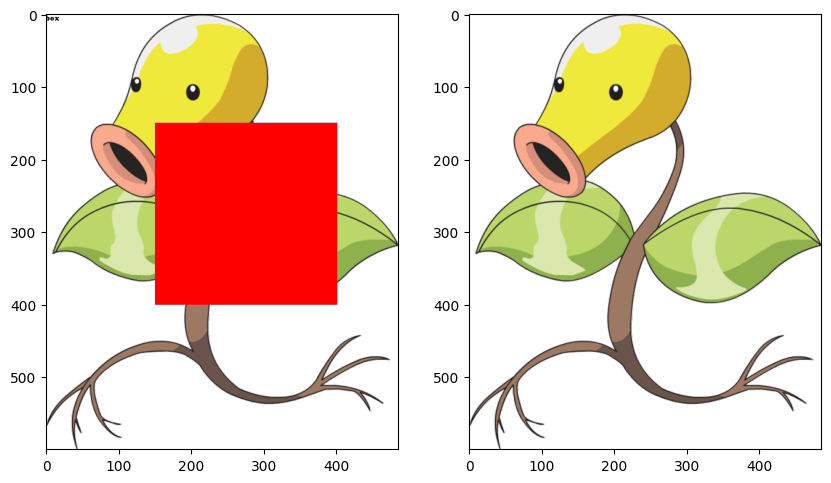

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(new_image)
plt.subplot(122)
plt.imshow(copy_image)
plt.show()

## Now we will manipulate images uing OpenCV

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

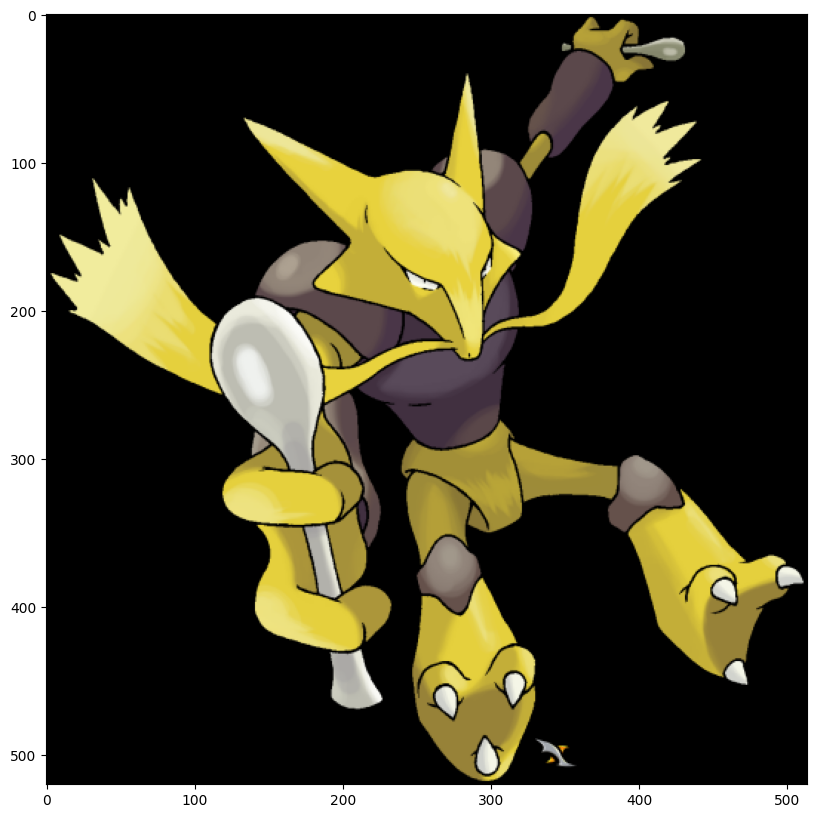

In [2]:
alakazam = cv2.imread("/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Alakazam/00000003.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(alakazam, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
A = alakazam

In [5]:
id(A) == id(alakazam)
id(A)

134258787023728

In [6]:
B = alakazam.copy()
id(B)==id(alakazam)

False

In [8]:
alakazam[:,:,] = 0

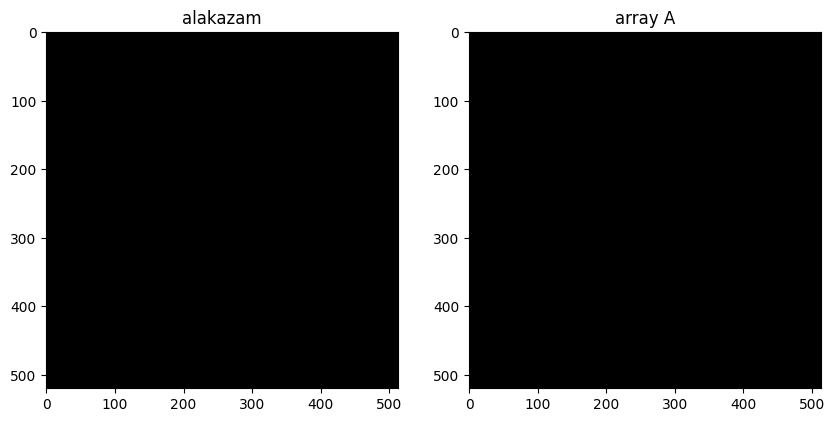

In [11]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(alakazam, cv2.COLOR_BGR2RGB))
plt.title("alakazam")
plt.subplot(122)
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title("array A")
plt.show()

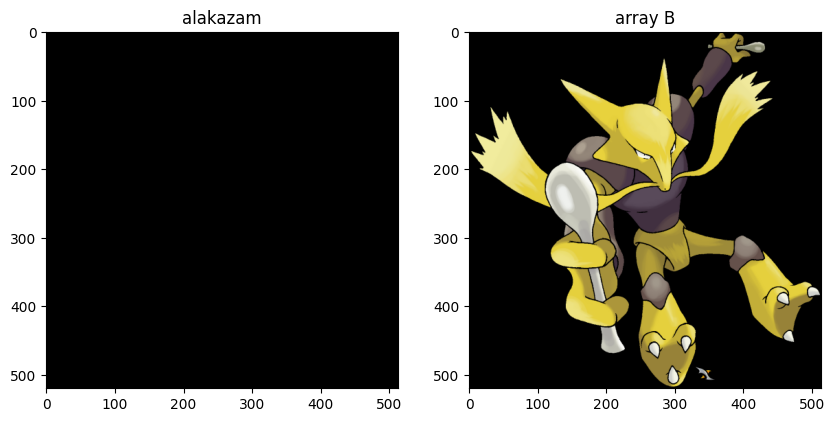

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(alakazam, cv2.COLOR_BGR2RGB))
plt.title("alakazam")
plt.subplot(122)
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title("array B")
plt.show()

##  Flipping Images

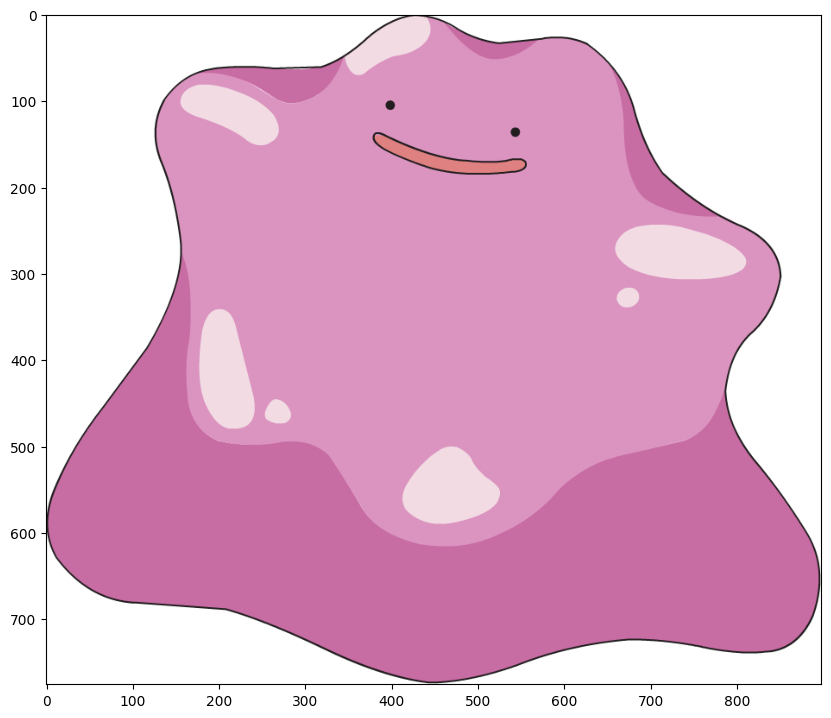

In [15]:
image = cv2.imread("/kaggle/input/pokemon-images-first-generation17000-files/pokemon/Ditto/00000003.png")
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
width, height, C =image.shape
print('width, height,C',width, height, C)

width, height,C 776 898 3


In [17]:
array_flip = np.zeros((width, height, C), dtype=np.uint8)

In [18]:
for i, row in enumerate(image):
    array_flip[width-1-i,:,:]=row

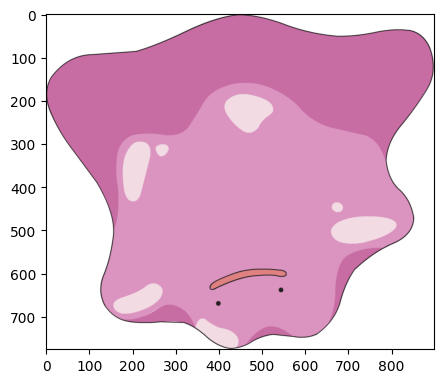

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB))
plt.show()

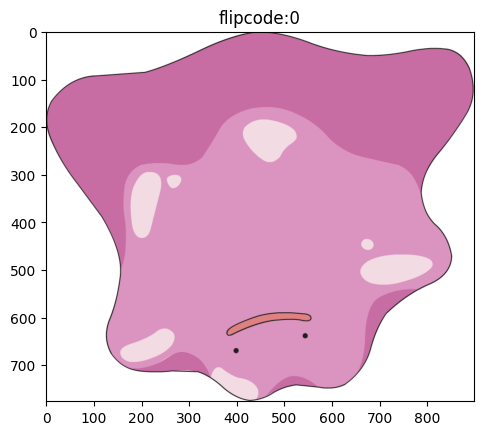

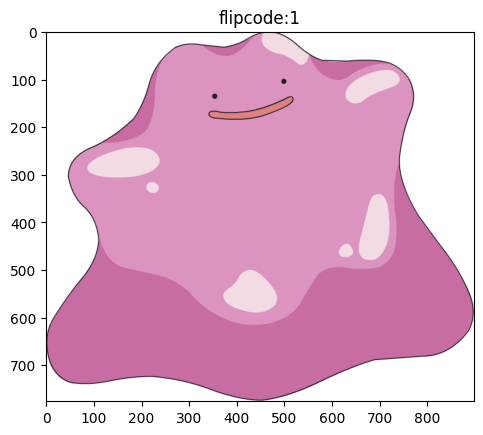

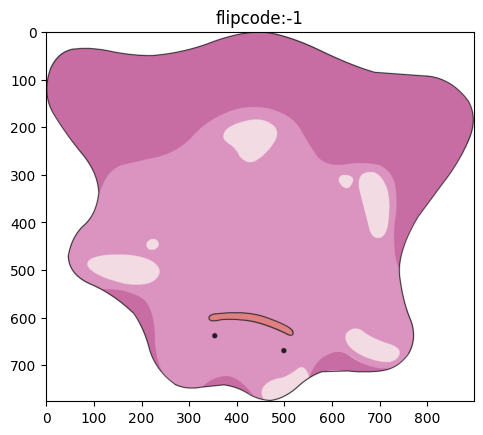

In [23]:
for flipcode in [0,1,-1]:
    im_flip = cv2.flip(image, flipcode)
    plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
    plt.title("flipcode:"+str(flipcode))
    plt.show()

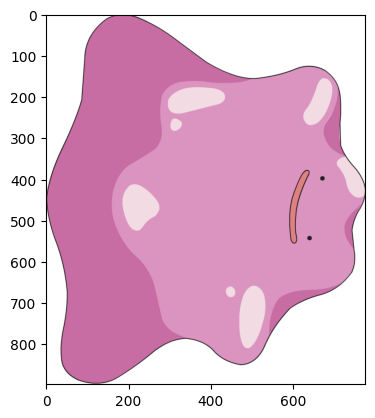

In [24]:
im_flip =cv2.rotate(image, 0)
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

In [26]:
flip["ROTATE_90_CLOCKWISE"]

0

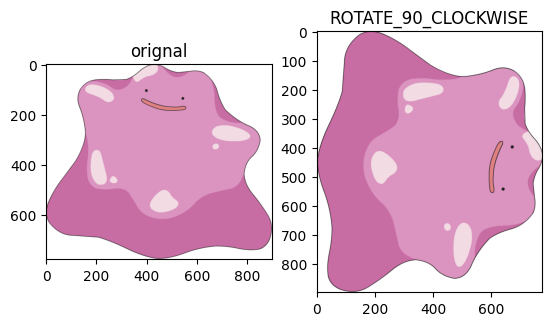

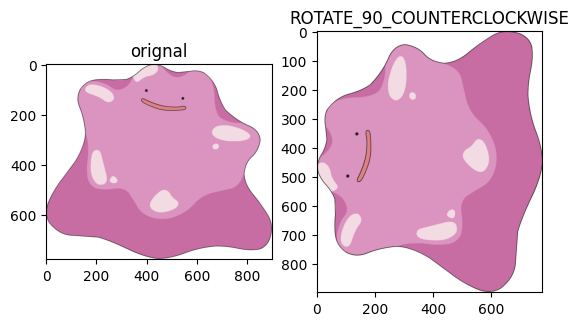

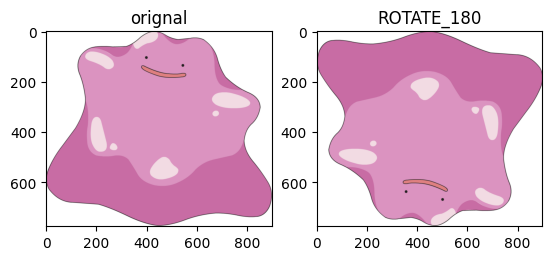

In [27]:
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.rotate(image,value), cv2.COLOR_BGR2RGB))
    plt.title(key)
    plt.show()

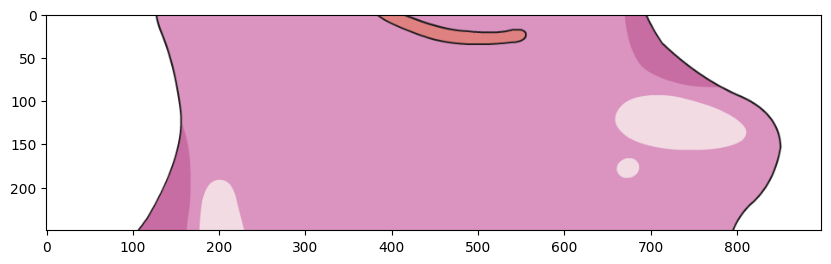

In [28]:
upper = 150
lower = 400
crop_top = image[upper: lower,:,:]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

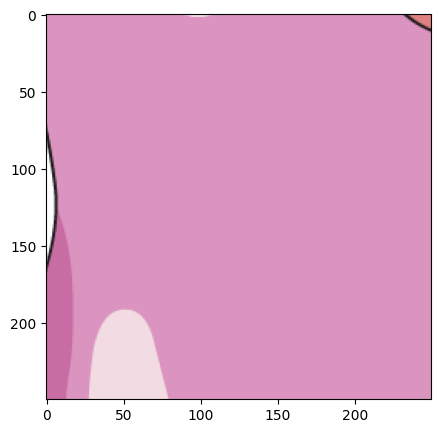

In [29]:
left = 150
right = 400
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
array_sq = np.copy(image)
array_sq[upper:lower,left:right,:] = 0

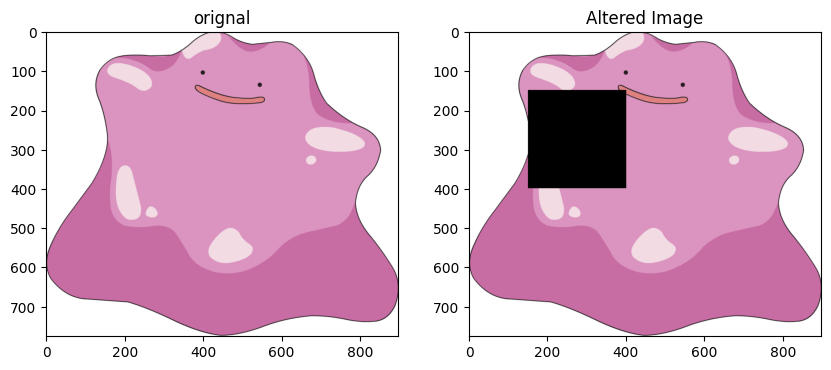

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(array_sq,cv2.COLOR_BGR2RGB))
plt.title("Altered Image")
plt.show()

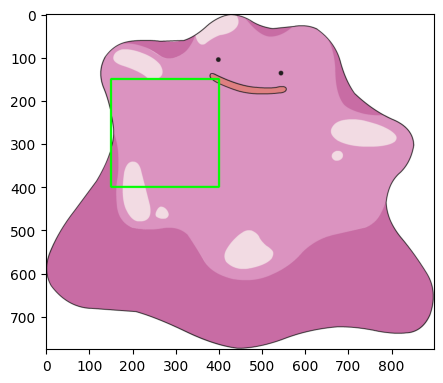

In [32]:
start_point, end_point = (left, upper),(right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3) 
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

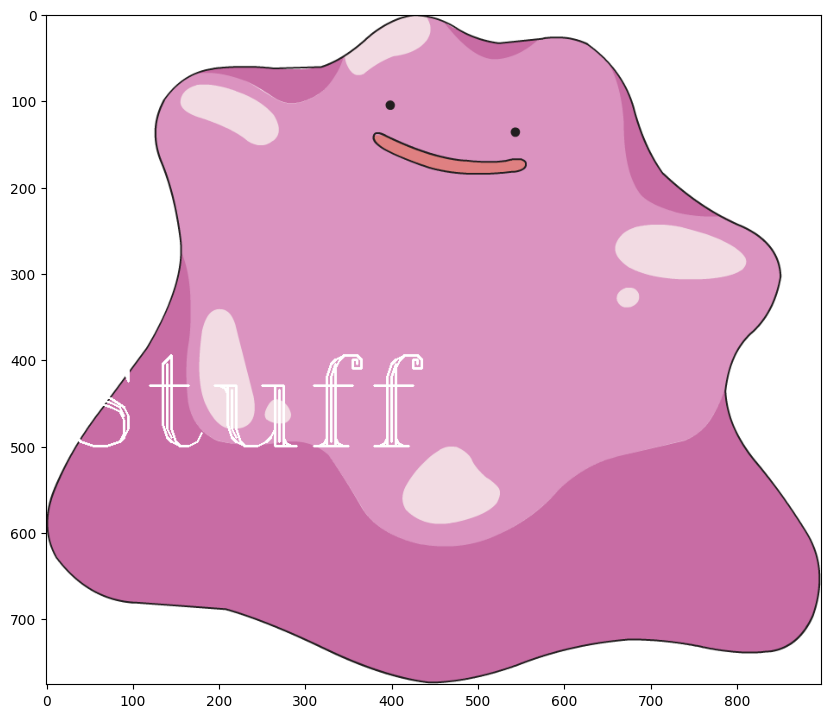

In [33]:
image_draw=cv2.putText(img=image,text='Stuff',org=(10,500),color=(255,255,255),fontFace=4,fontScale=5,thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()